In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data=pd.read_excel('PracticalData.xlsx')

In [64]:
data.head(5)

,Rollno,Name,Term,Attendence,Subject1_marks,Subject2_marks,Subject3_marks,Subject4_marks,Total_Marks,Percentage,Result
0,1,abc,A,36.0,40.0,41.0,48.0,65.0,194,53.6,Pass
1,2,bcd,A,88.0,75.0,NaN,NaN,42.0,117,23.4,Pass
2,3,cde,A,20.0,54.0,100.0,46.0,60.0,260,53.2,Fail
3,4,def,A,58.0,64.0,66.0,57.0,53.0,240,59.4,Pass
4,5,efg,A,72.0,53.0,72.0,58.0,80.0,263,65.6,Pass


In [65]:
data.shape

(30, 11)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rollno          30 non-null     int64  
 1   Name            30 non-null     object 
 2   Term            30 non-null     object 
 3   Attendence      29 non-null     float64
 4   Subject1_marks  28 non-null     float64
 5   Subject2_marks  28 non-null     float64
 6   Subject3_marks  27 non-null     float64
 7   Subject4_marks  29 non-null     float64
 8   Total_Marks     30 non-null     int64  
 9   Percentage      30 non-null     float64
 10  Result          30 non-null     object 
dtypes: float64(6), int64(2), object(3)
memory usage: 2.7+ KB


In [67]:
data.dtypes.value_counts()

float64    6
object     3
int64      2
dtype: int64

Handling the Missing values

In [68]:
#Handling the Missing values
data.isnull().sum()  
#columns having number of missing values
#Or we can also use command-> data.isna().sum()

Rollno            0
Name              0
Term              0
Attendence        1
Subject1_marks    2
Subject2_marks    2
Subject3_marks    3
Subject4_marks    1
Total_Marks       0
Percentage        0
Result            0
dtype: int64

In [69]:
cols = data.columns[data.isnull().any()].tolist()
print(cols)
#make a list of columns with missing values

['Attendence', 'Subject1_marks', 'Subject2_marks', 'Subject3_marks', 'Subject4_marks']


Fill the missing value using mean for float and int datatypes and for other forword fill

In [70]:
for col in cols:
    col_dt = data[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        data_col = data[col]
        for i in range(data.shape[0]):
            if (data_col[i] < 0 or data_col[i] > 100):
                data_col[i] = np.nan
        data_col.fillna(data_col.mean(), inplace=True)
    else:
        data[col] = data[col].fillna(method='ffill')


C:\Users\avant\AppData\Local\Temp\ipykernel_9868\932612429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_col[i] = np.nan


In [71]:
#check Missing values are removed or not
data.isnull().sum()  

Rollno            0
Name              0
Term              0
Attendence        0
Subject1_marks    0
Subject2_marks    0
Subject3_marks    0
Subject4_marks    0
Total_Marks       0
Percentage        0
Result            0
dtype: int64

No missing data 

Correction in Total Marks, Percentage after filling missing value

In [72]:
data['Total_Marks']=data['Subject1_marks']+data['Subject2_marks']+data['Subject3_marks']+data['Subject4_marks']
data['Percentage']=data['Total_Marks']/5

In [73]:
data

,Rollno,Name,Term,Attendence,Subject1_marks,Subject2_marks,Subject3_marks,Subject4_marks,Total_Marks,Percentage,Result
0,1,abc,A,36.000000,40.000000,41.000000,48.000000,65.000000,194.000000,38.800000,Pass
1,2,bcd,A,88.000000,75.000000,83.571429,58.481481,42.000000,259.052910,51.810582,Pass
2,3,cde,A,20.000000,54.000000,100.000000,46.000000,60.000000,260.000000,52.000000,Fail
3,4,def,A,58.000000,64.000000,66.000000,57.000000,53.000000,240.000000,48.000000,Pass
4,5,efg,A,72.000000,53.000000,72.000000,58.000000,80.000000,263.000000,52.600000,Pass
5,6,fgh,A,25.000000,49.000000,88.000000,73.000000,45.000000,255.000000,51.000000,Pass
6,7,ghi,A,90.000000,59.814815,78.000000,67.000000,50.000000,254.814815,50.962963,Pass
7,8,hij,A,36.000000,48.000000,92.000000,74.000000,46.000000,260.000000,52.000000,Pass
8,9,ijk,A,59.000000,78.000000,80.000000,72.000000,44.000000,274.000000,54.800000,Pass
9,10,jkl,A,82.000000,57.000000,75.000000,70.000000,59.000000,261.000000,52.200000,Pass


Outliers Detection

In [78]:
#import seaborn as sns
#To plot Box plot
#sns.boxplot(y='Subject2_marks',data=data)
#plt.show

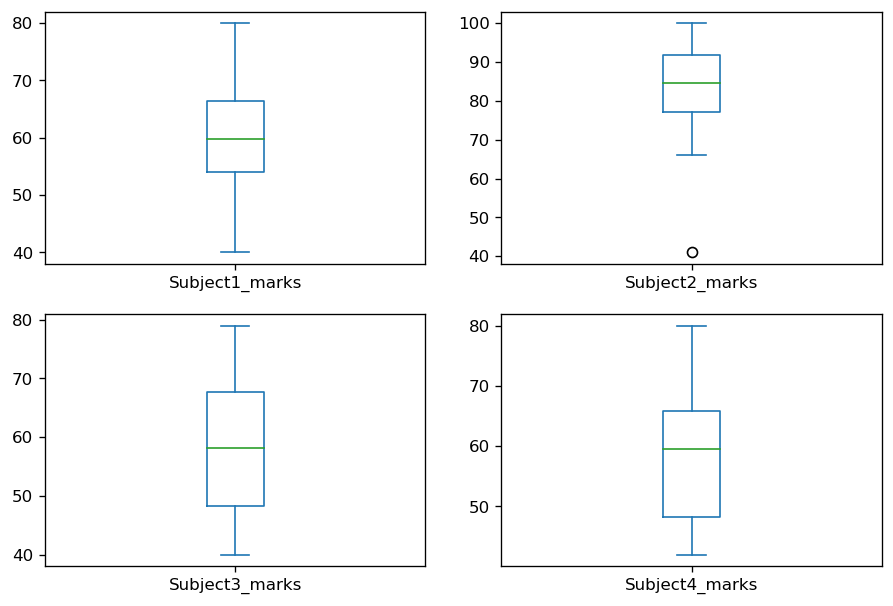

In [55]:
plt.rcParams["figure.figsize"] = (9, 6)
data_list = ['Subject1_marks', 'Subject2_marks', 'Subject3_marks', 'Subject4_marks'] 
fig, axes = plt.subplots(2, 2)
fig.set_dpi(120)
count=0
for r in range(2):
	for c in range(2):
		data[data_list[count]].plot(kind = 'box', ax=axes[r,c])
		count+=1

Removal of Outliers from Subject2_marks

In [60]:
Q1 = data['Subject2_marks'].quantile(0.25)
Q3 = data['Subject2_marks'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR
print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')


Q1 = 77.25, Q3 = 91.75, IQR = 14.5, Lower_limit = 55.5, Upper_limit = 113.5


In [49]:
data[(data['Subject2_marks'] < Lower_limit) | (data['Subject2_marks'] > Upper_limit)]

,Rollno,Name,Term,Attendence,Subject1_marks,Subject2_marks,Subject3_marks,Subject4_marks,Total_Marks,Percentage,Result
0,1,abc,A,36.0,40.0,41.0,48.0,65.0,194.0,38.8,Pass


In [50]:
data[(data['Subject2_marks'] < Lower_limit) & (data['Subject2_marks'] > Upper_limit)]

,Rollno,Name,Term,Attendence,Subject1_marks,Subject2_marks,Subject3_marks,Subject4_marks,Total_Marks,Percentage,Result


In [51]:
df=data[(data['Subject2_marks'] > Lower_limit)]
df

,Rollno,Name,Term,Attendence,Subject1_marks,Subject2_marks,Subject3_marks,Subject4_marks,Total_Marks,Percentage,Result
1,2,bcd,A,88.000000,75.000000,83.571429,58.481481,42.000000,259.052910,51.810582,Pass
2,3,cde,A,20.000000,54.000000,100.000000,46.000000,60.000000,260.000000,52.000000,Fail
3,4,def,A,58.000000,64.000000,66.000000,57.000000,53.000000,240.000000,48.000000,Pass
4,5,efg,A,72.000000,53.000000,72.000000,58.000000,80.000000,263.000000,52.600000,Pass
5,6,fgh,A,25.000000,49.000000,88.000000,73.000000,45.000000,255.000000,51.000000,Pass
6,7,ghi,A,90.000000,59.814815,78.000000,67.000000,50.000000,254.814815,50.962963,Pass
7,8,hij,A,36.000000,48.000000,92.000000,74.000000,46.000000,260.000000,52.000000,Pass
8,9,ijk,A,59.000000,78.000000,80.000000,72.000000,44.000000,274.000000,54.800000,Pass
9,10,jkl,A,82.000000,57.000000,75.000000,70.000000,59.000000,261.000000,52.200000,Pass
10,11,klm,A,34.000000,59.814815,99.000000,58.481481,67.000000,284.296296,56.859259,Pass


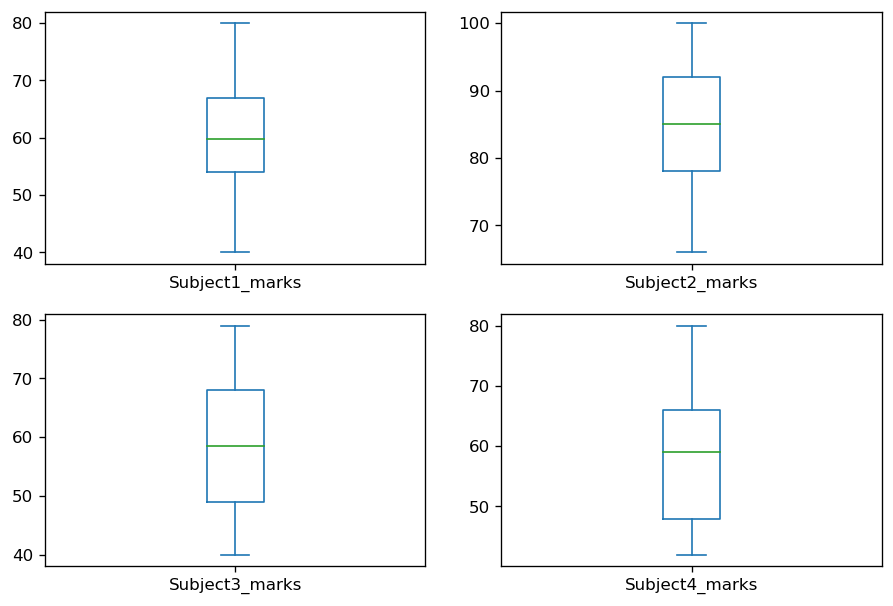

In [56]:
plt.rcParams["figure.figsize"] = (9, 6)
data_list = ['Subject1_marks', 'Subject2_marks', 'Subject3_marks', 'Subject4_marks'] 
fig, axes = plt.subplots(2, 2)
fig.set_dpi(120)
count=0
for r in range(2):
	for c in range(2):
		df[data_list[count]].plot(kind = 'box', ax=axes[r,c])
		count+=1

Convert Into Normal Distribution

In [53]:
data['Total_Marks_Scaled'] = (data['Total_Marks'] - data['Total_Marks'].min()) / (data['Total_Marks'].max() - data['Total_Marks'].min())

In [54]:
data.head()

,Rollno,Name,Term,Attendence,Subject1_marks,Subject2_marks,Subject3_marks,Subject4_marks,Total_Marks,Percentage,Result,Total_Marks_Scaled
0,1,abc,A,36.0,40.0,41.000000,48.000000,65.0,194.00000,38.800000,Pass,0.000000
1,2,bcd,A,88.0,75.0,83.571429,58.481481,42.0,259.05291,51.810582,Pass,0.591390
2,3,cde,A,20.0,54.0,100.000000,46.000000,60.0,260.00000,52.000000,Fail,0.600000
3,4,def,A,58.0,64.0,66.000000,57.000000,53.0,240.00000,48.000000,Pass,0.418182
4,5,efg,A,72.0,53.0,72.000000,58.000000,80.0,263.00000,52.600000,Pass,0.627273
